## Aluno: Davi Segundo Pinheiro - 417153

### Libs utilizadas na Lista 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, KFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

### Funcções Auxiliares

In [2]:
def show_metrics(teste_y, pred):
    print(f'Acurácia:  {accuracy_score(teste_y, pred)*100:.2f}%')
    print(f'Revocação: {recall_score(teste_y, pred)*100:.2f}%')
    print(f'Precisão:  {precision_score(teste_y, pred)*100:.2f}%')
    print(f'F1-score:  {f1_score(teste_y, pred)*100:.2f}%')
    print('\nClassfication Report:')
    print(classification_report(teste_y, pred_svc))
    
def show_curves(model, teste_x, teste_y):
    disp = plot_roc_curve(model, teste_x, teste_y)
    disp.ax_.set_title('ROC curve:')

    disp = plot_precision_recall_curve(model, teste_x, teste_y)
    disp.ax_.set_title('2-class Precision-Recall curve:')

### Carregando os Dados

In [3]:
# Leitura dos dados
dados = np.genfromtxt('./bostonbin.csv', delimiter=',')

# 2 primeiros dados do arquivo
dados[:2]

array([[ 2.01100e+03, -7.09550e+01,  4.22550e+01,  2.40000e+01,
         2.40000e+01,  6.32000e-03,  1.80000e+01,  2.31000e+00,
         0.00000e+00,  5.38000e-01,  6.57500e+00,  6.52000e+01,
         4.09000e+00,  1.00000e+00,  2.96000e+02,  1.53000e+01,
         3.96900e+02,  1.00000e+00],
       [ 2.02100e+03, -7.09500e+01,  4.22875e+01,  2.16000e+01,
         2.16000e+01,  2.73100e-02,  0.00000e+00,  7.07000e+00,
         0.00000e+00,  4.69000e-01,  6.42100e+00,  7.89000e+01,
         4.96710e+00,  2.00000e+00,  2.42000e+02,  1.78000e+01,
         3.96900e+02,  1.00000e+00]])

In [4]:
# Formato total dos nossos dados
dados.shape

(506, 18)

### Separação do X e y & Conjunto de treino e teste

In [5]:
np.random.seed(42)

# KFold de 10 splits
kf = KFold(n_splits=10, shuffle=True)

# Separação X e y
x = dados[:,:-1]
y = dados[:,[-1]]

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.3, stratify=y)

## Support Vector Machine (SVM)

#### Espaço dos parâmentros

In [6]:
c = []
gamma = []

for i in range(-5, 16, 2):
    c.append(2**i)

for i in range(-15, 4, 1):
    gamma.append(2**i)
    
print(c)
print(gamma)

[0.03125, 0.125, 0.5, 2, 8, 32, 128, 512, 2048, 8192, 32768]
[3.0517578125e-05, 6.103515625e-05, 0.0001220703125, 0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8]


### Estrutura de Otimização

In [7]:
svc = SVC()

pipe_svc = Pipeline(steps=[('scaler', StandardScaler()), ('svc', svc)])

svc_params = {
    'svc__kernel' : ['rbf'],
    'svc__C' : c,
    'svc__gamma' : gamma
}

search_svc = GridSearchCV(pipe_svc, svc_params, cv=kf)
search_svc.fit(treino_x, treino_y.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.03125, 0.125, 0.5, 2, 8, 32, 128, 512,
                                    2048, 8192, 32768],
                         'svc__gamma': [3.0517578125e-05, 6.103515625e-05,
                                        0.0001220703125, 0.000244140625,
                                        0.00048828125, 0.0009765625,
                                        0.001953125, 0.00390625, 0.0078125,
                                        0.015625, 0.03125, 0.0625, 0.125, 0.25,
                                        0.5, 1, 2, 4, 8],
                         'svc__kernel': ['rbf']})

### Melhores Resultados

In [8]:
resultados_svc = pd.DataFrame(search_svc.cv_results_).sort_values("mean_test_score", ascending=False).head()
resultados_svc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,param_svc__kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
143,0.005900,0.000944,0.001192,0.000402,512,0.03125,rbf,"{'svc__C': 512, 'svc__gamma': 0.03125, 'svc__k...",0.888889,0.777778,...,0.916667,0.828571,0.942857,0.885714,0.885714,0.885714,0.828571,0.875714,0.047299,1
174,0.006300,0.000897,0.000696,0.000456,8192,0.000244,rbf,"{'svc__C': 8192, 'svc__gamma': 0.000244140625,...",0.944444,0.833333,...,0.916667,0.771429,0.828571,0.914286,0.914286,0.942857,0.800000,0.875476,0.058893,2
190,0.005202,0.001181,0.000799,0.000400,32768,0.000031,rbf,"{'svc__C': 32768, 'svc__gamma': 3.0517578125e-...",0.944444,0.833333,...,0.888889,0.800000,0.857143,0.885714,0.914286,0.942857,0.771429,0.875476,0.056053,2
142,0.005991,0.000766,0.001005,0.000441,512,0.015625,rbf,"{'svc__C': 512, 'svc__gamma': 0.015625, 'svc__...",0.833333,0.833333,...,0.833333,0.800000,0.942857,0.914286,0.914286,0.914286,0.800000,0.873016,0.055205,4
124,0.004513,0.000659,0.001089,0.000315,128,0.03125,rbf,"{'svc__C': 128, 'svc__gamma': 0.03125, 'svc__k...",0.833333,0.805556,...,0.861111,0.800000,0.942857,0.914286,0.885714,0.914286,0.828571,0.873016,0.052078,4


#### Melhores Parâmetros

In [9]:
search_svc.best_params_

{'svc__C': 512, 'svc__gamma': 0.03125, 'svc__kernel': 'rbf'}

#### Melhor Modelo

In [10]:
best_model_svc = search_svc.best_estimator_
best_model_svc

Pipeline(steps=[('scaler', StandardScaler()),
                ('svc', SVC(C=512, gamma=0.03125))])

### Treinamento com todos os dados

In [11]:
best_model_svc.fit(treino_x, treino_y.ravel())
pred_svc = best_model_svc.predict(teste_x)

### Apresentação das Métricas: SVC

In [12]:
show_metrics(teste_y, pred_svc)

Acurácia:  86.84%
Revocação: 88.24%
Precisão:  88.24%
F1-score:  88.24%

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        67
         1.0       0.88      0.88      0.88        85

    accuracy                           0.87       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.87      0.87       152



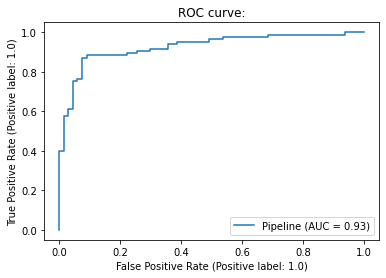

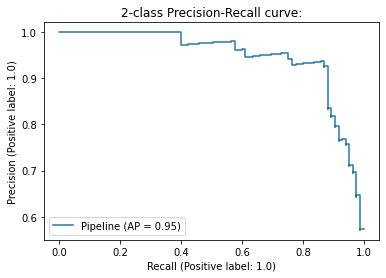

In [13]:
show_curves(best_model_svc, teste_x, teste_y)

## Random Forest

#### Espaço dos parâmentros

In [14]:
n_est = []
max_d = []

for i in range(10, 210, 10):
    n_est.append(i)

for i in range(2, 10, 2):
    max_d.append(i)
max_d.append(None)

print(n_est)
print(max_d)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
[2, 4, 6, 8, None]


### Estrutura de Otimização

In [15]:
random_forest = RandomForestClassifier()

pipe_rf = Pipeline(steps=[('scaler', StandardScaler()), ('forest', random_forest)])

random_forest_params = {
    'forest__n_estimators' : n_est,
    'forest__max_depth' : max_d
}

search_rf = GridSearchCV(pipe_rf, random_forest_params, cv=kf)
search_rf.fit(treino_x, treino_y.ravel())

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('forest', RandomForestClassifier())]),
             param_grid={'forest__max_depth': [2, 4, 6, 8, None],
                         'forest__n_estimators': [10, 20, 30, 40, 50, 60, 70,
                                                  80, 90, 100, 110, 120, 130,
                                                  140, 150, 160, 170, 180, 190,
                                                  200]})

### Melhores Resultados

In [16]:
resultados_rf = pd.DataFrame(search_rf.cv_results_).sort_values("mean_test_score", ascending=False).head()
resultados_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_forest__max_depth,param_forest__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
82,0.046899,0.001644,0.003297,0.000630,None,30,"{'forest__max_depth': None, 'forest__n_estimat...",0.972222,0.861111,0.888889,0.888889,0.942857,0.857143,0.885714,0.828571,0.914286,0.885714,0.892540,0.039757,1
85,0.091183,0.003217,0.006116,0.001134,None,60,"{'forest__max_depth': None, 'forest__n_estimat...",0.916667,0.888889,0.888889,0.833333,0.971429,0.828571,0.885714,0.857143,0.857143,0.885714,0.881349,0.039719,2
75,0.237399,0.004602,0.014396,0.000496,8,160,"{'forest__max_depth': 8, 'forest__n_estimators...",0.916667,0.861111,0.888889,0.888889,0.942857,0.800000,0.914286,0.828571,0.857143,0.885714,0.878413,0.040695,3
88,0.147894,0.010337,0.008917,0.000837,None,90,"{'forest__max_depth': None, 'forest__n_estimat...",0.916667,0.861111,0.861111,0.861111,0.942857,0.800000,0.885714,0.885714,0.857143,0.885714,0.875714,0.036335,4
63,0.060601,0.002969,0.004094,0.000535,8,40,"{'forest__max_depth': 8, 'forest__n_estimators...",0.916667,0.861111,0.861111,0.888889,0.971429,0.857143,0.914286,0.828571,0.800000,0.857143,0.875635,0.046445,5


#### Melhores Parâmetros

In [17]:
search_rf.best_params_

{'forest__max_depth': None, 'forest__n_estimators': 30}

#### Melhor Modelo

In [18]:
best_model_rf = search_rf.best_estimator_
best_model_rf

Pipeline(steps=[('scaler', StandardScaler()),
                ('forest', RandomForestClassifier(n_estimators=30))])

### Treinamento com todos os dados

In [19]:
best_model_rf.fit(treino_x, treino_y.ravel())
pred_rf = best_model_rf.predict(teste_x)

### Apresentação das Métricas: Random Forest

In [20]:
show_metrics(teste_y, pred_rf)

Acurácia:  85.53%
Revocação: 84.71%
Precisão:  88.89%
F1-score:  86.75%

Classfication Report:
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85        67
         1.0       0.88      0.88      0.88        85

    accuracy                           0.87       152
   macro avg       0.87      0.87      0.87       152
weighted avg       0.87      0.87      0.87       152



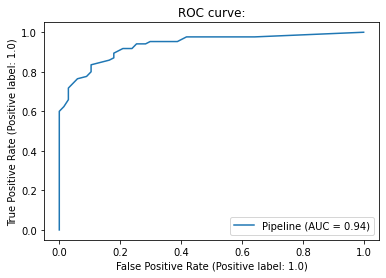

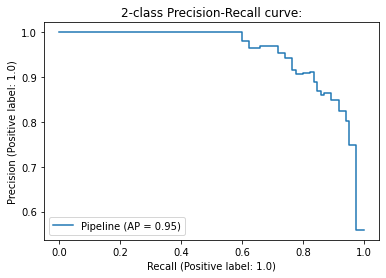

In [21]:
show_curves(best_model_rf, teste_x, teste_y)